The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


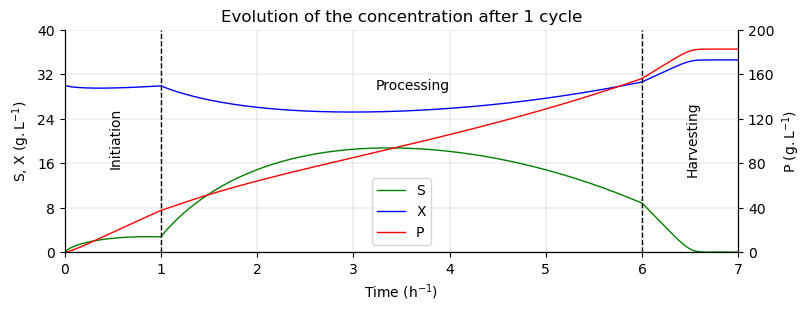

In [528]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams.update({'font.size': 10})

# Constants
mu_max = 0.3 # 1/h
Ks = 0.8 # g/L
Ki = 100 # g/L
Yxs = 0.45
Yxp = 0.15
Fi = 0.2 # L/h
Fp = 0.5 # L/h
Fh = 2.5 # L/h
ti = 1 # h
tp = 5 # h
th = 1 # h
t_cycle = tp + th # h
S0 = 80 # g/L
Sp = 80 # g/L

def model(t, y):
    NS, NX, NP, V = y

    mu_net = mu_max*(NS/V)/(Ks + (NS/V)*(1 + (NS/V)/Ki))

    if t < ti:
        dNSdt = Fi*S0 - mu_net*NX/Yxs
        dNXdt = mu_net*NX
        dNPdt = mu_net*NX/Yxp
        dVdt = Fi

    elif (t - 1) % t_cycle < tp:
        dNSdt = Fp*Sp - mu_net*NX/Yxs
        dNXdt = mu_net*NX
        dNPdt = mu_net*NX/Yxp
        dVdt = Fp

    else:
        dNSdt = -Fh*NS/V - mu_net*NX/Yxs
        dNXdt = -Fh*NX/V + mu_net*NX
        dNPdt = -Fh*NP/V + mu_net*NX/Yxp
        dVdt = -Fh

    return [dNSdt, dNXdt, dNPdt, dVdt]

# Initial conditions
y0 = [0, 30*0.85, 0, 0.85]
t_span = [0, 1 + t_cycle]

# Solve ODE
sol = solve_ivp(model, t_span, y0, method = "Radau", t_eval = np.linspace(0, 1 + t_cycle, 1000), max_step = (1 + t_cycle/1000))

t = sol.t
NS, NX, NP, V = sol.y

# Plot results
fig = plt.figure()
ax = fig.add_subplot(111)

lns1 = ax.plot(t, NS/V, linewidth = 1.0, color = "green", label = "S")
lns2 = ax.plot(t, NX/V, linewidth = 1.0, color = "blue", label = "X")

ax2 = ax.twinx()
lns3 = ax2.plot(t, NP/V, linewidth = 1.0, color = "red", label = "P")

lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 8)

ax.grid(linewidth = 0.25)
ax.set_xlabel(r"Time ($\mathregular{h^{-1}}$)")
ax.set_ylabel(r"S, X ($\mathregular{g.L^{-1}}$)")
ax.set_xlim(0, 7)
ax.set_ylim(0, 40)
ax.set_yticks(np.linspace(0, 40, 6))
ax.spines['top'].set_visible(False)
ax.vlines(1, 0, 40, color = "black", linewidth = 1, linestyle = "--")
ax.annotate('Initiation', xy=(0.6, 20.5), xytext=(0.6, 20.5), xycoords='data', textcoords='data',
            rotation=90, ha='right', va='center', fontsize = 10, color='black')
ax.annotate('Processing', xy=(4, 30), xytext=(4, 30), xycoords='data', textcoords='data', ha='right', va='center', fontsize = 10, color='black')
ax.annotate('Harvesting', xy=(6.6, 20.5), xytext=(6.6, 20.5), xycoords='data', textcoords='data',
            rotation=90, ha='right', va='center', fontsize = 10, color='black')
ax.vlines(6, 0, 40, color = "black", linewidth = 1, linestyle = "--")

ax2.set_ylabel(r"P ($\mathregular{g.L^{-1}}$)")
ax2.set_xlim(0, 7)
ax2.set_ylim(0, 200)
ax2.set_yticks(np.linspace(0, 200, 6))

plt.title("Evolution of the concentration after 1 cycle")
plt.savefig("Images\\1.1.eps", format = "eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


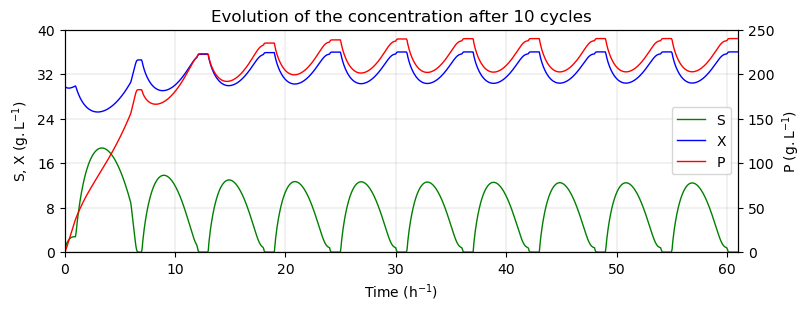

In [529]:
# Initial conditions
y0 = [0, 30*0.85, 0, 0.85]
t_span = [0, 1 + 10*t_cycle]

# Solve ODE
sol = solve_ivp(model, t_span, y0, method = "BDF", t_eval=np.linspace(0, 1 + 10*t_cycle, 1000), max_step = (1 + 10*t_cycle)/1000)

t = sol.t
NS, NX, NP, V = sol.y

# Plot results
fig = plt.figure()
ax = fig.add_subplot(111)

lns1 = ax.plot(t, NS/V, linewidth = 1.0, color = "green", label = "S")
lns2 = ax.plot(t, NX/V, linewidth = 1.0, color = "blue", label = "X")

ax2 = ax.twinx()
lns3 = ax2.plot(t, NP/V, linewidth = 1.0, color = "red", label = "P")

lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]

ax.legend(lns, labs, loc = 0)
ax.grid(linewidth = 0.25)
ax.set_xlabel(r"Time ($\mathregular{h^{-1}}$)")
ax.set_ylabel(r"S, X ($\mathregular{g.L^{-1}}$)")
ax.set_xlim(0, 61)
ax.set_ylim(0, 40)
ax.set_yticks(np.linspace(0, 40, 6))

ax2.set_ylabel(r"P ($\mathregular{g.L^{-1}}$)")
ax2.set_xlim(0, 61)
ax2.set_ylim(0, 250)
ax2.set_yticks(np.linspace(0, 250, 6))

plt.title("Evolution of the concentration after 10 cycles")
plt.savefig("Images\\1.2.eps", format = "eps")
plt.show()

In [530]:
t_harv = 1 + 9*t_cycle + tp
NP_harv = NP[t >= t_harv]
V_harv = V[t >= t_harv]

P_harv = np.trapz(Fh*NP_harv/V_harv, t[t >= t_harv])

prod_rate = P_harv/(t_cycle)

print(prod_rate)

97.66394871919374
